Load the file GDS5037.soft (see Exercise 5.1) and filter the data such that it only contains the probe ids listed in the file 52-probes.ids and the subject ids listed in the files 52-control.ids and 52-asthma.ids.

1. Create a box plot of gene expression levels for each subject. Do you notice visible differences between the subjects or between the groups?

2. Use a T-test to find differentially expressed genes (i.e. probes for which the means are different between the control and asthma groups). Adjust the p-values with the Benjamini-Hochberg method.

3. Create histograms of the unadjusted and adjusted p-values. Why do these two histograms differ?

4. How many differentially expressed genes (i.e. statistically significant differences) are there at the false discovery rate of 0.05?

5. Sort the adjusted p-values in ascending order. Which genes do the first ten probes correspond to?

In [34]:
import pandas as pd
from scipy import stats
import statsmodels
from statsmodels.stats import multitest
import matplotlib.pyplot as matplt
import numpy as np

In [3]:
data = pd.read_csv('GDS5037.soft' ,sep='\t',index_col=0,skiprows=160,skipfooter=1, engine='python' )

In [4]:
columns = []
rows_control = []
rows_asthma = []
with open('Data files-20230929/52-probes.ids', 'r') as file1:
    for line in file1:
        name1 = line.strip()
        columns.append(name1)
with open('Data files-20230929/52-control.ids', 'r') as file2:
    for line in file2:
        name2 = line.strip()
        rows_control.append(name2)
with open('Data files-20230929/52-asthma.ids', 'r') as file3:
    for line in file3:
        name3 = line.strip()
        rows_asthma.append(name3)

In [5]:
filtered_df = data[data.index.isin(columns)]
fd_control = filtered_df[rows_control]
fd_asthma = filtered_df[rows_asthma]

<Axes: title={'center': 'Asthma'}, xlabel='Subjects'>

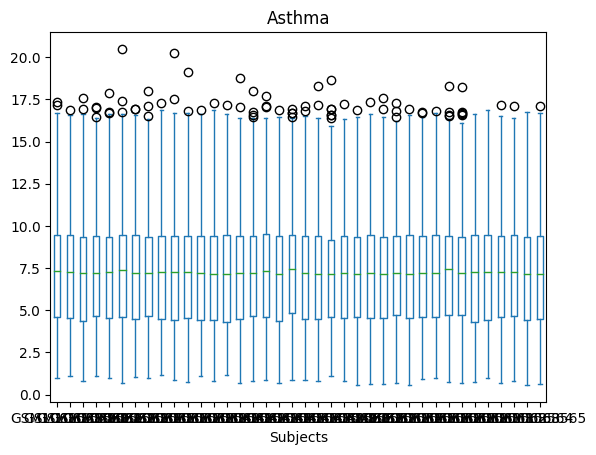

In [6]:
fd_asthma.plot.box(title="Asthma", xlabel="Subjects")

<Axes: title={'center': 'Control'}, xlabel='Subjects'>

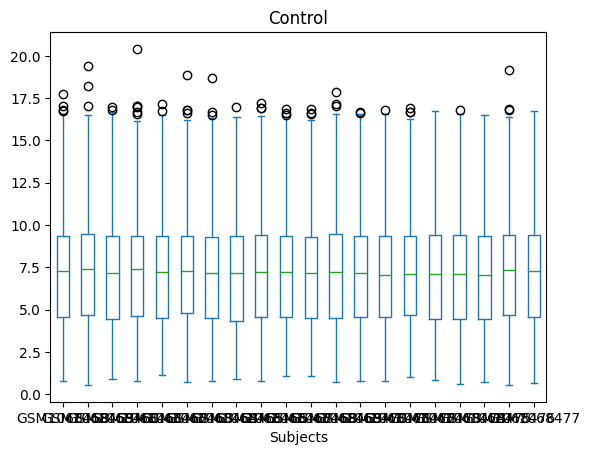

In [7]:
fd_control.plot.box(title="Control", xlabel="Subjects")

In [8]:
fd_control.iloc[0]

GSM1068458     9.73450
GSM1068459     9.82071
GSM1068460    10.38230
GSM1068461    10.43700
GSM1068462    10.37030
GSM1068463    10.59030
GSM1068464    10.48990
GSM1068465    10.76750
GSM1068466    10.57110
GSM1068467     9.91477
GSM1068468     9.92303
GSM1068469    10.01580
GSM1068470    10.43390
GSM1068471    10.34840
GSM1068472     9.87855
GSM1068473     9.86533
GSM1068474    10.33830
GSM1068475    10.38450
GSM1068476    10.56270
GSM1068477    10.34940
Name: A_23_P100355, dtype: float64

In [43]:
p_values =[]
for i in range(filtered_df.shape[0]):
    p_values.append(stats.ttest_ind(fd_control.iloc[i],fd_asthma.iloc[i])[1])
multi = multitest.multipletests(p_values, method='fdr_bh')[1]

In [44]:
multi

array([3.64522730e-01, 2.37599342e-01, 1.03992963e-01, 9.65955268e-01,
       6.07930229e-01, 6.51798512e-01, 7.00411451e-01, 8.66460937e-01,
       4.76829490e-01, 6.13235015e-01, 2.07716120e-01, 8.84382027e-01,
       2.12510143e-01, 8.78195158e-01, 4.03898161e-01, 6.39953913e-02,
       1.34534051e-01, 9.23644722e-01, 9.06922177e-01, 4.75444424e-02,
       1.22095230e-01, 9.71215860e-01, 6.51903765e-01, 3.60764404e-01,
       2.50610364e-01, 1.83733876e-02, 8.28580110e-01, 7.51749383e-01,
       8.52234290e-01, 9.57734248e-01, 6.55248851e-01, 8.88192226e-01,
       7.67097443e-01, 9.19470475e-01, 9.80034622e-01, 3.66136875e-01,
       6.43812475e-01, 7.77137945e-01, 6.68756351e-01, 4.93196039e-01,
       9.63218660e-01, 6.58730598e-01, 6.21313588e-01, 7.93968834e-01,
       5.54470565e-01, 7.47648543e-01, 9.80034622e-01, 2.56795178e-01,
       7.88666919e-01, 4.40734139e-01, 3.08685877e-01, 8.61827224e-01,
       1.29111106e-01, 6.03748986e-02, 3.76874020e-01, 9.30310427e-01,
      

In [15]:
filtered_df

,IDENTIFIER,GSM1068478,GSM1068479,GSM1068481,GSM1068482,GSM1068483,GSM1068486,GSM1068487,GSM1068488,GSM1068490,...,GSM1068529,GSM1068530,GSM1068534,GSM1068536,GSM1068541,GSM1068553,GSM1068554,GSM1068558,GSM1068559,GSM1068564
ID_REF,,,,,,,,,,,,,,,,,,,,,
A_23_P100355,PPP4C,10.24100,9.83397,10.57510,11.50290,10.43480,10.94140,10.10980,10.57850,10.32650,...,10.58790,9.92278,10.91780,10.50670,9.76194,10.84220,10.23890,10.21060,10.48320,10.63990
A_23_P101829,LPAR2,7.48322,7.00301,7.46059,7.69887,6.69851,7.38052,7.00521,7.80149,7.11033,...,7.75561,7.28093,7.69540,7.41056,7.32859,7.05768,7.18528,7.50311,7.61950,7.11162
A_23_P102235,SNRPG,12.10810,12.09510,12.40160,12.99840,12.32560,12.53430,12.15880,12.66790,12.03830,...,12.31100,12.29380,12.28650,12.57090,12.27170,12.49970,12.49800,12.29720,12.35510,12.23110
A_23_P102607,CHD6,6.84074,6.84925,6.92672,6.08834,6.91310,6.40929,6.73572,6.95177,7.11959,...,6.83549,7.28494,6.86333,6.53237,6.82334,6.61118,6.53902,6.85812,6.87079,7.01142
A_23_P102743,TRMT6,6.99931,7.20281,6.92102,6.76839,6.93504,7.11538,6.93542,7.18280,6.93116,...,6.71932,6.79291,6.43080,6.99264,6.85862,7.15947,7.14707,6.91354,7.21952,7.04567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A_32_P80255,DDX6,9.62247,9.10197,9.25918,9.69999,9.82744,9.14926,9.99612,9.66484,9.25573,...,9.44959,9.56902,9.41488,9.31170,10.07090,9.71236,9.71472,9.75629,9.44850,9.81349
A_32_P83784,ARAP2,9.09755,8.67016,9.16050,8.72611,8.02611,8.54056,8.54723,8.72009,8.35759,...,8.16160,8.56396,8.13722,8.38305,8.55198,8.42831,8.42547,8.50516,8.47277,8.61916
A_32_P902988,MATN1,8.81956,8.81182,9.54734,10.16950,8.61034,7.51525,12.06180,9.29121,8.24883,...,10.31780,9.19470,10.75380,9.53976,8.75896,10.36520,8.14547,12.11820,8.48703,11.18370


In [16]:
filtered_df.isna().sum().sum()

0

In [17]:
filtered_df.shape[0]

793

In [18]:
benjamini_hochberg = statsmodels.stats.multitest.fdrcorrection(p_values)[1]

(array([33., 24., 15., 26., 26., 11., 15., 37., 51., 28., 22., 41., 48.,
        97., 25., 53., 39., 65., 69., 68.]),
 array([1.95829934e-04, 5.01237720e-02, 1.00051714e-01, 1.49979656e-01,
        1.99907598e-01, 2.49835540e-01, 2.99763482e-01, 3.49691425e-01,
        3.99619367e-01, 4.49547309e-01, 4.99475251e-01, 5.49403193e-01,
        5.99331135e-01, 6.49259077e-01, 6.99187019e-01, 7.49114961e-01,
        7.99042903e-01, 8.48970845e-01, 8.98898787e-01, 9.48826730e-01,
        9.98754672e-01]),
 <BarContainer object of 20 artists>)

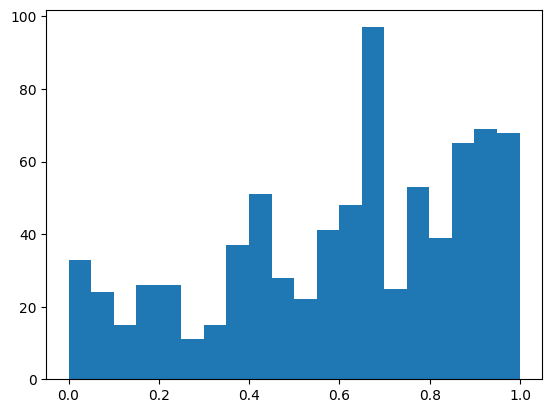

In [46]:
matplt.hist(benjamini_hochberg,bins=20)

(array([133.,  60.,  58.,  37.,  41.,  39.,  53.,  41.,  25.,  28.,  31.,
         30.,  24.,  26.,  32.,  27.,  31.,  26.,  24.,  27.]),
 array([2.46948214e-07, 4.99379682e-02, 9.98756894e-02, 1.49813411e-01,
        1.99751132e-01, 2.49688853e-01, 2.99626574e-01, 3.49564296e-01,
        3.99502017e-01, 4.49439738e-01, 4.99377459e-01, 5.49315181e-01,
        5.99252902e-01, 6.49190623e-01, 6.99128344e-01, 7.49066065e-01,
        7.99003787e-01, 8.48941508e-01, 8.98879229e-01, 9.48816950e-01,
        9.98754672e-01]),
 <BarContainer object of 20 artists>)

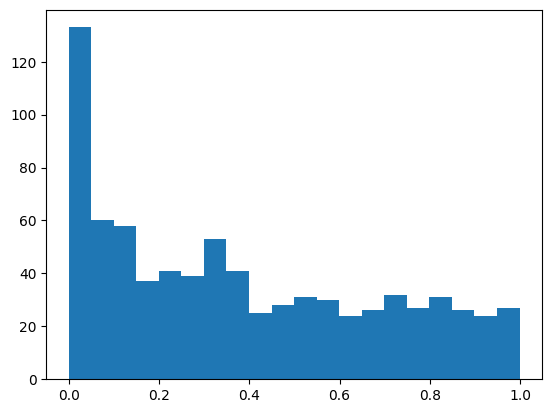

In [45]:
matplt.hist(p_values,bins=20)

In [32]:
statsmodels.stats.multitest.fdrcorrection(p_values)[1].sort()

In [35]:
sorted = np.sort(benjamini_hochberg)
sorted

array([1.95829934e-04, 9.24409480e-04, 6.72939570e-03, 6.74898065e-03,
       7.43911226e-03, 1.14797566e-02, 1.35819083e-02, 1.35819083e-02,
       1.73736192e-02, 1.83453342e-02, 1.83733876e-02, 1.83733876e-02,
       1.90056541e-02, 2.44851494e-02, 2.87286811e-02, 2.96586284e-02,
       3.36361886e-02, 3.36361886e-02, 3.36361886e-02, 3.44682677e-02,
       3.78393583e-02, 3.87680102e-02, 4.41881681e-02, 4.41881681e-02,
       4.41881681e-02, 4.41881681e-02, 4.41881681e-02, 4.56633530e-02,
       4.61996013e-02, 4.68597883e-02, 4.75444424e-02, 4.75444424e-02,
       4.87183699e-02, 5.11345373e-02, 5.53706750e-02, 5.59877976e-02,
       5.59877976e-02, 6.03748986e-02, 6.03748986e-02, 6.03748986e-02,
       6.03748986e-02, 6.03748986e-02, 6.11121331e-02, 6.15384803e-02,
       6.39953913e-02, 6.39953913e-02, 6.39953913e-02, 6.39953913e-02,
       6.72525799e-02, 6.72525799e-02, 6.98862169e-02, 7.00027543e-02,
       8.92403985e-02, 8.92403985e-02, 8.92403985e-02, 8.92403985e-02,
      

In [ ]:
print((p_values.adjusted <= 0.05).sum(), end=\n')